In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from keras.preprocessing.image import ImageDataGenerator

In [ ]:
train_gen = ImageDataGenerator(rescale=1/255.0)

train_generator = train_gen.flow_from_directory(
    "/content/drive/My Drive/Driver Distraction/train",
    target_size=(224,224),
    color_mode="rgb",
    batch_size = 32,
    class_mode='categorical'
)

Found 242 images belonging to 4 classes.


In [ ]:
train_generator.class_indices

{'Head Drop': 0, 'Safe': 1, 'Swing': 2, 'Yawning': 3}

In [ ]:
reverse_dict = { 0 :'Head Drop' ,1 : 'Safe',2 : "Swing" ,3 : 'Yawning'}

In [ ]:
reverse_dict.items()

dict_items([(0, 'Head Drop'), (1, 'Safe'), (2, 'Swing'), (3, 'Yawning')])

In [ ]:
test_gen = ImageDataGenerator(rescale=1/255.0)

test_generator = test_gen.flow_from_directory(
    "/content/drive/My Drive/Driver Distraction/test",
    target_size=(224,224),
    color_mode="rgb",
    batch_size = 32,
    class_mode='categorical'
)

Found 62 images belonging to 4 classes.


In [ ]:
def draw_image(img,label):
    plt.style.use("seaborn")
    plt.title(reverse_dict[label])
    plt.imshow(img)
    plt.show()

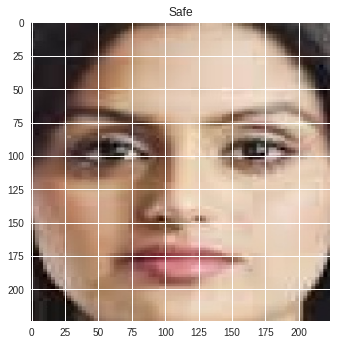

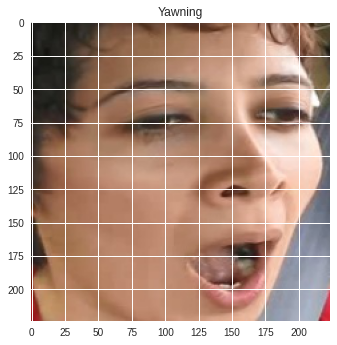

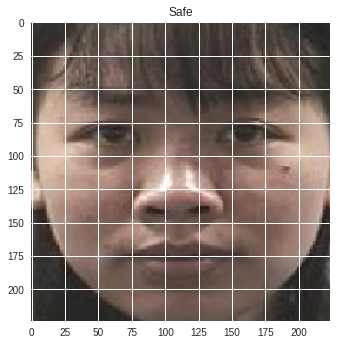

In [ ]:
x,y = train_generator.next()
for i in range(3):
    draw_image(x[i],np.argmax(y[i]))

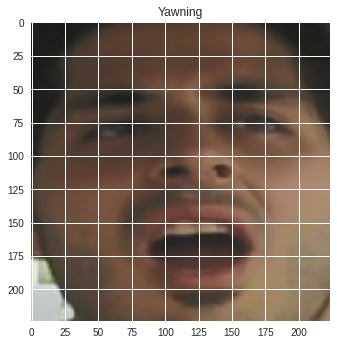

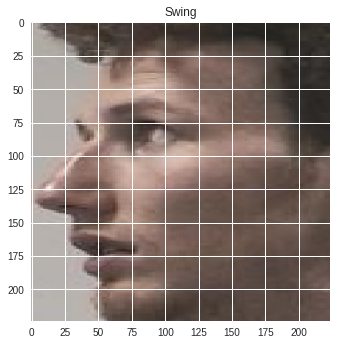

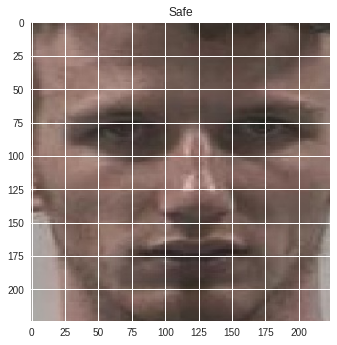

In [ ]:
x,y = test_generator.next()
for i in range(3):
    draw_image(x[i],np.argmax(y[i]))

# CNN Model

In [ ]:
from keras.applications import MobileNetV2
from keras.layers import *
from keras.optimizers import Adam

# Keras API
from keras.models import Model

In [ ]:
model = MobileNetV2(input_shape=(224,224,3),include_top=False,weights='imagenet')

In [ ]:
dr = Dropout(0.5)(model.output)
gap1 = GlobalAveragePooling2D()(dr)
fc1 = Dense(4,activation='softmax')(gap1)

In [ ]:
model_new = Model(inputs=model.input,outputs=fc1)

In [ ]:
for ix in range(152):
    model_new.layers[ix].trainable= False

In [ ]:
adam = Adam(lr=0.0001)

In [ ]:
model_new.compile(optimizer=adam,loss='categorical_crossentropy',metrics=['accuracy'])

In [ ]:
model_new.summary()

Model: "functional_21"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_7 (InputLayer)            [(None, 224, 224, 3) 0                                            
__________________________________________________________________________________________________
Conv1_pad (ZeroPadding2D)       (None, 225, 225, 3)  0           input_7[0][0]                    
__________________________________________________________________________________________________
Conv1 (Conv2D)                  (None, 112, 112, 32) 864         Conv1_pad[0][0]                  
__________________________________________________________________________________________________
bn_Conv1 (BatchNormalization)   (None, 112, 112, 32) 128         Conv1[0][0]                      
______________________________________________________________________________________

In [ ]:
from keras.callbacks import ModelCheckpoint

In [ ]:
checkpoint = ModelCheckpoint("/content/drive/My Drive/Driver Distraction/driver.hdf5",monitor='val_loss',save_best_only=True)

hist = model_new.fit_generator(
    train_generator,
    steps_per_epoch = len(train_generator),
    epochs = 5,
    validation_data = test_generator,
    validation_steps = len(test_generator),
    callbacks=[checkpoint]
)

Epoch 1/5
8/8 [==============================] - 1s 156ms/step - loss: 0.0741 - accuracy: 0.9835 - val_loss: 0.2023 - val_accuracy: 0.9194
Epoch 2/5
8/8 [==============================] - 1s 153ms/step - loss: 0.0676 - accuracy: 0.9876 - val_loss: 0.1941 - val_accuracy: 0.9194
Epoch 3/5
8/8 [==============================] - 1s 145ms/step - loss: 0.0629 - accuracy: 0.9835 - val_loss: 0.1720 - val_accuracy: 0.9355
Epoch 4/5
8/8 [==============================] - 1s 150ms/step - loss: 0.0414 - accuracy: 1.0000 - val_loss: 0.1575 - val_accuracy: 0.9516
Epoch 5/5
8/8 [==============================] - 1s 146ms/step - loss: 0.0347 - accuracy: 1.0000 - val_loss: 0.1497 - val_accuracy: 0.9677
